# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

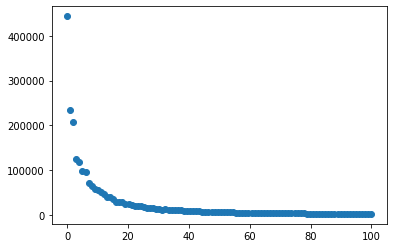

450


In [35]:
# Samples corresponding to the last digit of your roll number (plot a)
from numpy import linalg as LA
roll_data = np.array([]).reshape(0,784)
for i,j in zip(train_data,train_labels):
    if(j == 9):
        roll_data=np.vstack((roll_data,i))
covariance = np.cov(roll_data.T)
eigen = LA.eig(covariance)
plt.scatter(np.linspace(0,100,100),eigen[0][0:100])
plt.show()


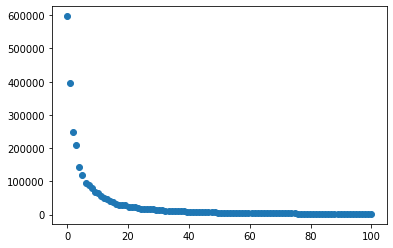

450


In [36]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
from numpy import linalg as LA
roll_data = np.array([]).reshape(0,784)
for i,j in zip(train_data,train_labels):
    if(j == 0):
        roll_data=np.vstack((roll_data,i))
covariance = np.cov(roll_data.T)
eigen = LA.eig(covariance)
plt.scatter(np.linspace(0,100,100),eigen[0][0:100])
plt.show()

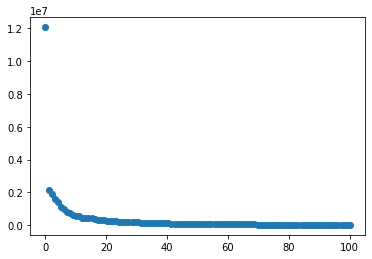

658


In [37]:
# All training data (plot c)
from numpy import linalg as LA
covariance = np.cov(train_data)
eigen = LA.eig(covariance.T)
plt.scatter(np.linspace(0,100,100),eigen[0][0:100])
plt.show()

/home/faizan/.local/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


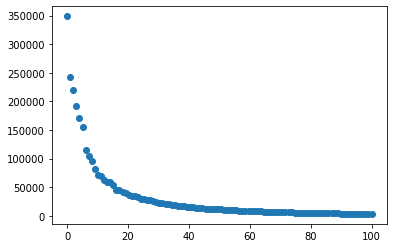

640


In [39]:
# Randomly selected 50% of the training data (plot d)
from numpy import linalg as LA
rand = np.arange(6000);
np.random.shuffle(rand);
rand_data = np.array([]).reshape(0,784)
for i in range(0,3000):
    rand_data = np.vstack((rand_data,train_data[rand[i]]))
covariance = np.cov(rand_data.T)
eigen = LA.eig(covariance)
plt.scatter(np.linspace(0,100,100),eigen[0][0:100])
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

No , the plots are almost similar. That is because 0 and 9 are quite similar and have similar covariance matrix so the plots are quite similar.

Yes , the plots are different because the covaraince matrix is different which in turn leads to different eigen vlaues.

plot A: Approximate rank of plot a has to be at least greater than 200 , this can be said by looking at the graph where we find that the values are quite clustered and approximaltely will be greater than 200
plot B: this will also be > 200 due to the same reasons.
My approximations were confirmed by findind out the actual ranks of the above matrix.
plot C & D: In this case rank will be at least > 400 , because the eigen values here are much scattered than in A and B.
Again the approximations were confirmed bby looking at the actual rank.

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

There is a possibility of 2^784 images.
The MNIST database provided to us has 6,000 training images and 1,000 testing images.So , we have (7,000/2^784)*100% available.
The covariance matrix would be a full rank matrix i.e a covariance matrix with 784 rank.
So the matrix would have 784 non-zero eigen values.

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

Multiplication with an orthonormal matrix is same as linear transformation of rotation, as orthonormal matrixes are rotation matrixes, since eignvector is a vector along which matrix does only scaling, rotatation only rotatates the vector however, to does so uniformly in all directions so there would be no change to value. 

$cov = (X - u)^T (X - u)$

$cov = S^TDS$ (on applying SVD decomposition)

$X' = XQ$ and $u^{\prime} = {u}Q$.

$cov' = Q^T(X - u)^T (X - u)Q$

$cov' = Q^T cov Q$

$cov' = Q^TS^TDSQ$

$cov' = (SQ)^TD(SQ)$

Q' = SQ as orthonormal times orthonormal is orthonormal.
This shows the diagonal does not change therefore eigenvalues are unchanged.

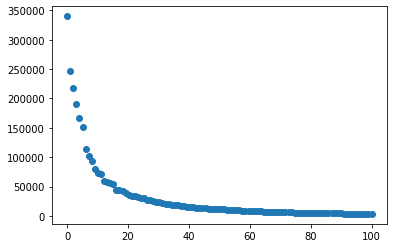

In [6]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
from numpy import linalg as LA
q,r =  np.linalg.qr(train_data.T)
# f_o = q.dot(q.T)
new_data = q.dot(train_data.T)
covariance = np.cov(new_data)
eigen = LA.eig(covariance.T)
# eigen value specturm of the new covariance matrix.
plt.scatter(np.linspace(0,100,100),eigen[0][0:100])
plt.show()
# code goes here

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

W K T that rank(B*A) <= min(rank(B),rank(A))
Therefore rank of the new matrix will be less than or equal to the matriz with lower rank.

We have
rank(AB)=dim(R(AB)),rank(A)=dim(R(A)).

In general, if a vector space V
is a subset of a vector space W, then we have
dim(V)≤dim(W).
Thus, it is suffiient to show that the vector space R(AB) is a subset of the vector space R(A)

Consider any vector y∈R(AB)

Then there exists a vector x∈Rl such that y=(AB)x by the definition of the range.
Let z=Bx∈Rn

Then we have
y=A(Bx)=Az
and thus the vector y is in R(A). Thus R(AB) is a subset of R(A) and we have
rank(AB)=dim(R(AB))≤dim(R(A))=rank(A)

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

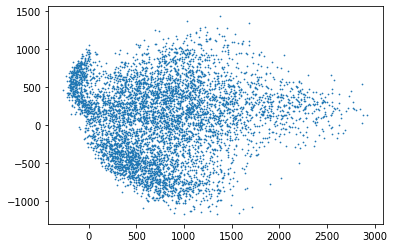

In [8]:
# Plotting code here
covariance = np.cov(train_data.T)
w,v = LA.eig(covariance)
x = np.multiply(train_data,v[:,0]);
y = np.multiply(train_data,v[:,1]);
x = np.sum(x[:],axis=1)
y = np.sum(y[:],axis=1)
x = np.real(x)
y = np.real(y)
plt.scatter(x,y,s=0.5)

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [9]:
agg_cov = np.zeros((10,784,784));
agg_mean = np.zeros((10,784));
for i in range(0,10):
    l = train_data[(np.where(train_labels == i))]
    agg_cov[i] = np.cov(l.T);
    agg_mean[i] = np.mean(l,axis=0);
deter = np.zeros(10);
agg_cov_inv = np.zeros((10,784,784));
for i in range(0,10):
    agg_cov_inv[i] = LA.pinv(agg_cov[i])
    u,v = LA.eig(agg_cov[i]);
    r = LA.matrix_rank(u);
    deter[i] = np.sum(np.log(u[0:r]));
ck = 0;
for j in range(len(test_data)):
    maxi = -99999999;
    pred_label = -1;
    for i in range(0,10):
#       
        p = (-(0.5*deter[i]) - (1/2)*((test_data[j] - agg_mean[i]).dot(agg_cov_inv[i]).dot(test_data[j] - agg_mean[i]).T));
        if p > maxi:
            maxi = p;
            pred_label = i;
#             print(pred_label)
    if pred_label == test_labels[j]:
        ck = ck +1;

print(ck/10);

/home/faizan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


74.4


In [10]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
# this is same as MLL because the prior knowledge in this case is that each sample point has an equal probability to be in 
# it's sample space , so here the addition of priori estimation does not affect the final result. SO , we can just discard
# the use of that term as it has no affect on the final answer.

agg_cov = np.zeros((10,784,784));
agg_mean = np.zeros((10,784));
for i in range(0,10):
    l = train_data[(np.where(train_labels == i))]
    agg_cov[i] = np.cov(l.T);
    agg_mean[i] = np.mean(l,axis=0);
deter = np.zeros(10);
agg_cov_inv = np.zeros((10,784,784));
for i in range(0,10):
    agg_cov_inv[i] = LA.pinv(agg_cov[i])
    u,v = LA.eig(agg_cov[i]);
    r = LA.matrix_rank(u);
    deter[i] = np.sum(np.log(u[0:r]));
ck = 0;
for j in range(len(test_data)):
    maxi = -99999999;
    pred_label = -1;
    for i in range(0,10):
#       
        p = (-(0.5*deter[i]) - (1/2)*((test_data[j] - agg_mean[i]).dot(agg_cov_inv[i]).dot(test_data[j] - agg_mean[i]).T));
        if p > maxi:
            maxi = p;
            pred_label = i;
#             print(pred_label)
    if pred_label == test_labels[j]:
        ck = ck +1;

print(ck/10);

In [11]:
# Print accuracy using Bayesian pairwise majority voting method
from numpy import linalg as LA

dist = np.zeros((2, 1000))
bucket = np.zeros((1000,10))
for i in range(9):
    data_i = train_data[np.where(train_labels == i)]
    mean_i = np.mean(data_i,axis=0)  
    cov_i = np.cov(data_i.T)
    for j in range(i+1,10):
        data_j = train_data[np.where(train_labels == j)]
        cov_j = np.cov(data_j.T)
        cov =(cov_i + cov_j)/2.0
        mean_j = np.mean(data_j,axis=0)
        cov_inv = LA.pinv(cov);
        relat_shit_i = test_data - mean_i;
        relat_shit_j = test_data - mean_j;
        t_dist_i = relat_shit_i.dot(cov_inv.dot(relat_shit_i.T))
        t_dist_j = relat_shit_j.dot(cov_inv.dot(relat_shit_j.T))
        dist[0] = np.diagonal(t_dist_i);
        dist[1] = np.diagonal(t_dist_j);
#         res=np.argmin(x,0)
        for k in range(1000):
            if dist[0,k] <= dist[1,k]:
                bucket[k,i] = bucket[k,i]+1
            else:
                bucket[k,j] = bucket[k,j]+1

pred_label = np.argmax(bucket,1);                
final = test_labels.astype(int) - pred_label;

ck = 0;      
for i in range(len(final)):
    if final[i] == 0:
        ck = ck + 1;
print(ck/10);

83.7


In [12]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
bucket = np.zeros((1000,10));
dist = np.zeros((2,1000));

for i in range(0,9):
    data_i = train_data[(np.where(train_labels == i))];
#     print(data_i.shape)
    mean_i = np.mean(data_i,axis=0);
#     print(mean_i.shape)
    for j in range(i+1,10):
        data_j = train_data[(np.where(train_labels == j))];
        mean_j = np.mean(data_j,axis=0);
        
        dist[0] = np.diagonal((test_data - mean_i).dot((test_data - mean_i).T));
        dist[1] = np.diagonal((test_data - mean_j).dot((test_data - mean_j).T));
        for k in range(0,1000):
            if dist[1,k] >= dist[0,k]:
                bucket[k,i] = bucket[k,i] + 1;
            else:
                bucket[k,j] = bucket[k,j] + 1;
                
pred_label = np.argmax(bucket,1);                
final = test_labels.astype(int) - pred_label;

ck = 0;      
for i in range(len(final)):
    if final[i] == 0:
        ck = ck + 1;
print(ck/10);

         

77.0


### 1.3.3 Question 4
Compare performances and salient observations

- In the first question, MAP and MLL accuracies are exactly same beacuse in the training dataset there are 600 examples of each class and terefore the apriori estimation is 0.1 in all the cases so probanility in oth cases, MLL and MAP are same.
- Simple perpendicular bisector is fastest to run but gives lesser accuracy on this test data than bayesian pairwise majority voting method.
- Mathematically MAP and MLL are most robust, without any assumptions which are carried by next methods, but it gives least accurate results.
- There are many numberical errors which emerge due to large size of matrixes which cause anomalies in the result, for example covariance matrix does not have rational eignvalues which cause numberical errors and reduces its rank than what it is matematically. Also method of generation of covariance matrix also seems to affect the results in part 1 using np.zeros() to generate a numpy array and using np.empty() give differnet results.

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [15]:
from numpy import linalg as LA
def nn(arr_1,arr_2):
    dist = 0;
    dist = LA.norm(arr_1-arr_2); 
    return dist

#   FOR K = 1
ck=0;
dist = 0;
for i,j in zip(test_data,test_labels):
        mini = np.zeros(1);
        labels = np.zeros(1);
        mini[0] = 100000000;
        labels[0] = -1;
        ind = 0;
        lol=[]
        for k,l in zip(train_data,train_labels):
            dist = nn(i,k);
            min_ind = 0;
            fin_ind = -1;
            while min_ind >= 0:
                if dist < mini[min_ind]:
                    fin_ind = min_ind;
                    min_ind = min_ind - 1;
                else:
                    min_ind = - 1;
            if fin_ind > -1:
                mini[fin_ind] = dist;            
                labels[fin_ind] = l;
        for i in range(len(labels)):
            lol.append(labels[i]);
#         lol = stats.mode(labels,axis=None)
        res = max(lol,key = lol.count)
        if res == j:
            ck = ck + 1;
print(ck/10)

#  FOR K = 3


ck=0;
dist = 0;
for i,j in zip(test_data,test_labels):
        mini = np.zeros(3);
        labels = np.zeros(3);
        mini[0] = mini[1] = mini[2] =100000000;
        labels[0] = labels[1] = labels[2] = -1;
        ind = 0;
        lol = [];
        for k,l in zip(train_data,train_labels):
            dist = nn(i,k);
            min_ind = 2;
            fin_ind = -1;
            while min_ind >= 0:
                if dist < mini[min_ind]:
                    fin_ind = min_ind;
                    min_ind = min_ind - 1;
                else:
                    min_ind = - 1;
            if fin_ind > -1:
                mini[fin_ind] = dist;            
                labels[fin_ind] = l;
        for i in range(len(labels)):
            lol.append(labels[i])
#         lol = stats.mode(labels,axis=None)
        res = max(lol,key = lol.count)
        if res == j:
            ck = ck + 1;
print(ck/10)



#  FOR K = 7




ck=0;
dist = 0;
for i,j in zip(test_data,test_labels):
        mini = np.zeros(7);
        labels = np.zeros(7);
        mini[0] = mini[1] = mini[2] = mini[3] = mini[4] = mini[5] = mini[6] =100000000;
        labels[0] = labels[1] = labels[2] = labels[3] = labels[4] = labels[5] = labels[6] = -1;
        ind = 0;
        lol = [];
        for k,l in zip(train_data,train_labels):
            dist = nn(i,k);
            min_ind = 6;
            fin_ind = -1;
            while min_ind >= 0:
                if dist < mini[min_ind]:
                    fin_ind = min_ind;
                    min_ind = min_ind - 1;
                else:
                    min_ind = - 1;
            if fin_ind > -1:
                mini[fin_ind] = dist;            
                labels[fin_ind] = l;
        for i in range(len(labels)):
            lol.append(labels[i]);
#         lol = stats.mode(labels,axis=None)
        res = max(lol,key = lol.count)
        if res == j:
            ck = ck + 1;
print(ck/10)

90.7
92.5
90.3


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [16]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [18]:
a = np.zeros((20), dtype=bool)
for i in range(0,mixed_data.shape[0]):
    mini = np.zeros(3);
    labels = np.zeros(3);
    mini[0] = mini[1] = mini[2] = 100000000;
    labels[0] = labels[1] = labels[2] = -1;
    ind = 0;
    for j in range(0,mixed_data.shape[0]):
        if i != j:
            dist = nn(mixed_data[i],mixed_data[j]);
        else:
            dist = 100000000;
        min_ind = 2;
        fin_ind = -1;
        while min_ind >= 0:
            if dist < mini[min_ind]:
                fin_ind = min_ind;
                min_ind = min_ind - 1;
            else:
                min_ind = - 1;
        if fin_ind > -1:
            mini[fin_ind] = dist;            
            labels[fin_ind] = j;
    for i in range(0,a.shape[0]):
        for j in range(0,3):
            if labels[j] == i:
                a[i] = True;
for i in range(len(a)):
    if a[i] == False:
        print(i+1);

12


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

Using K Nearest Neighbour,I first found the nearest neighbour from train_data sample to the given test_data and then assume the neatness value of the test_data sample to be 
$$ neatness = \frac{classID}{10} $$
here,classID is of the nearest neighbour or in case of K > 1, the class with maximum frequency.

Basically , we try to find out the predicted labels on the test data and then calculate neatness score.
we are taking the mean absolute error.

$$ neatness = abs\frac{(test labels - predicted lables)}{10} $$
$$ neatness = \frac{neatness}{1000}$$

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [20]:
# Your code here
from numpy import linalg as LA
def nn(arr_1,arr_2):
    dist = 0;
    dist = LA.norm(arr_1-arr_2); 
    return dist
ck=0;
pred_label=np.zeros((1000));
dist = 0;
for i,j in zip(test_data,test_labels):
        mini = np.zeros(3);
        lol = [];
        labels = np.zeros(3);
        mini[0] = mini[1] = mini[2] =100000000;
        labels[0] = labels[1] = labels[2] = -1;
        ind = 0;
        for k,l in zip(train_data,train_labels):
            dist = nn(i,k);
            min_ind = 2;
            fin_ind = -1;
            while min_ind >= 0:
                if dist < mini[min_ind]:
                    fin_ind = min_ind;
                    min_ind = min_ind - 1;
                else:
                    min_ind = - 1;
            if fin_ind > -1:
                mini[fin_ind] = dist;            
                labels[fin_ind] = l;
        for i in range(len(labels)):
            lol.append(labels[i]);
        res = max(lol, key = lol.count);
#         print(res);
#         print(labels);
#         stats.mode(labels,axis=None)
        pred_label[ck] = res;
        ck = ck + 1;
# print(ck)
test = abs(pred_label - test_labels)/10;
test_1 = sum(test);
final = test_1/1000;
print(final);

0.02890000000000001


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---